# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px


from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

# Loading data from the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Dataset using Pandas.read_csv

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Getting necessary information about the Dataset

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Finding the Correlation between the Features

In [ ]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Finding Number of Null values in Dataset

<Axes: >

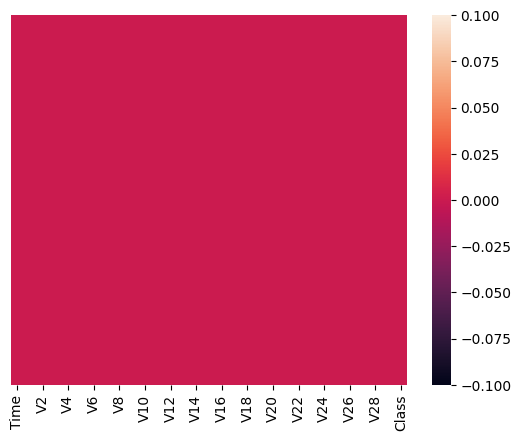

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)

<Axes: >

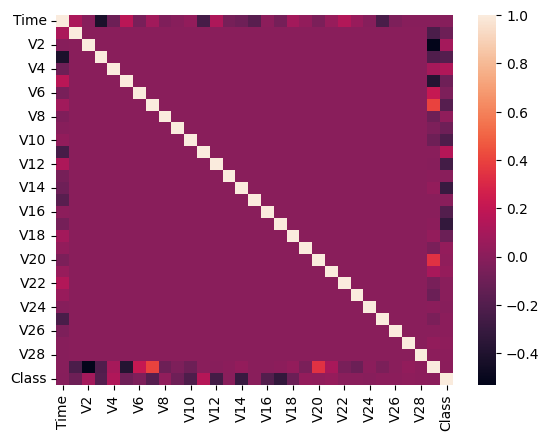

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Looking at the distribution of the Features of the Dataset

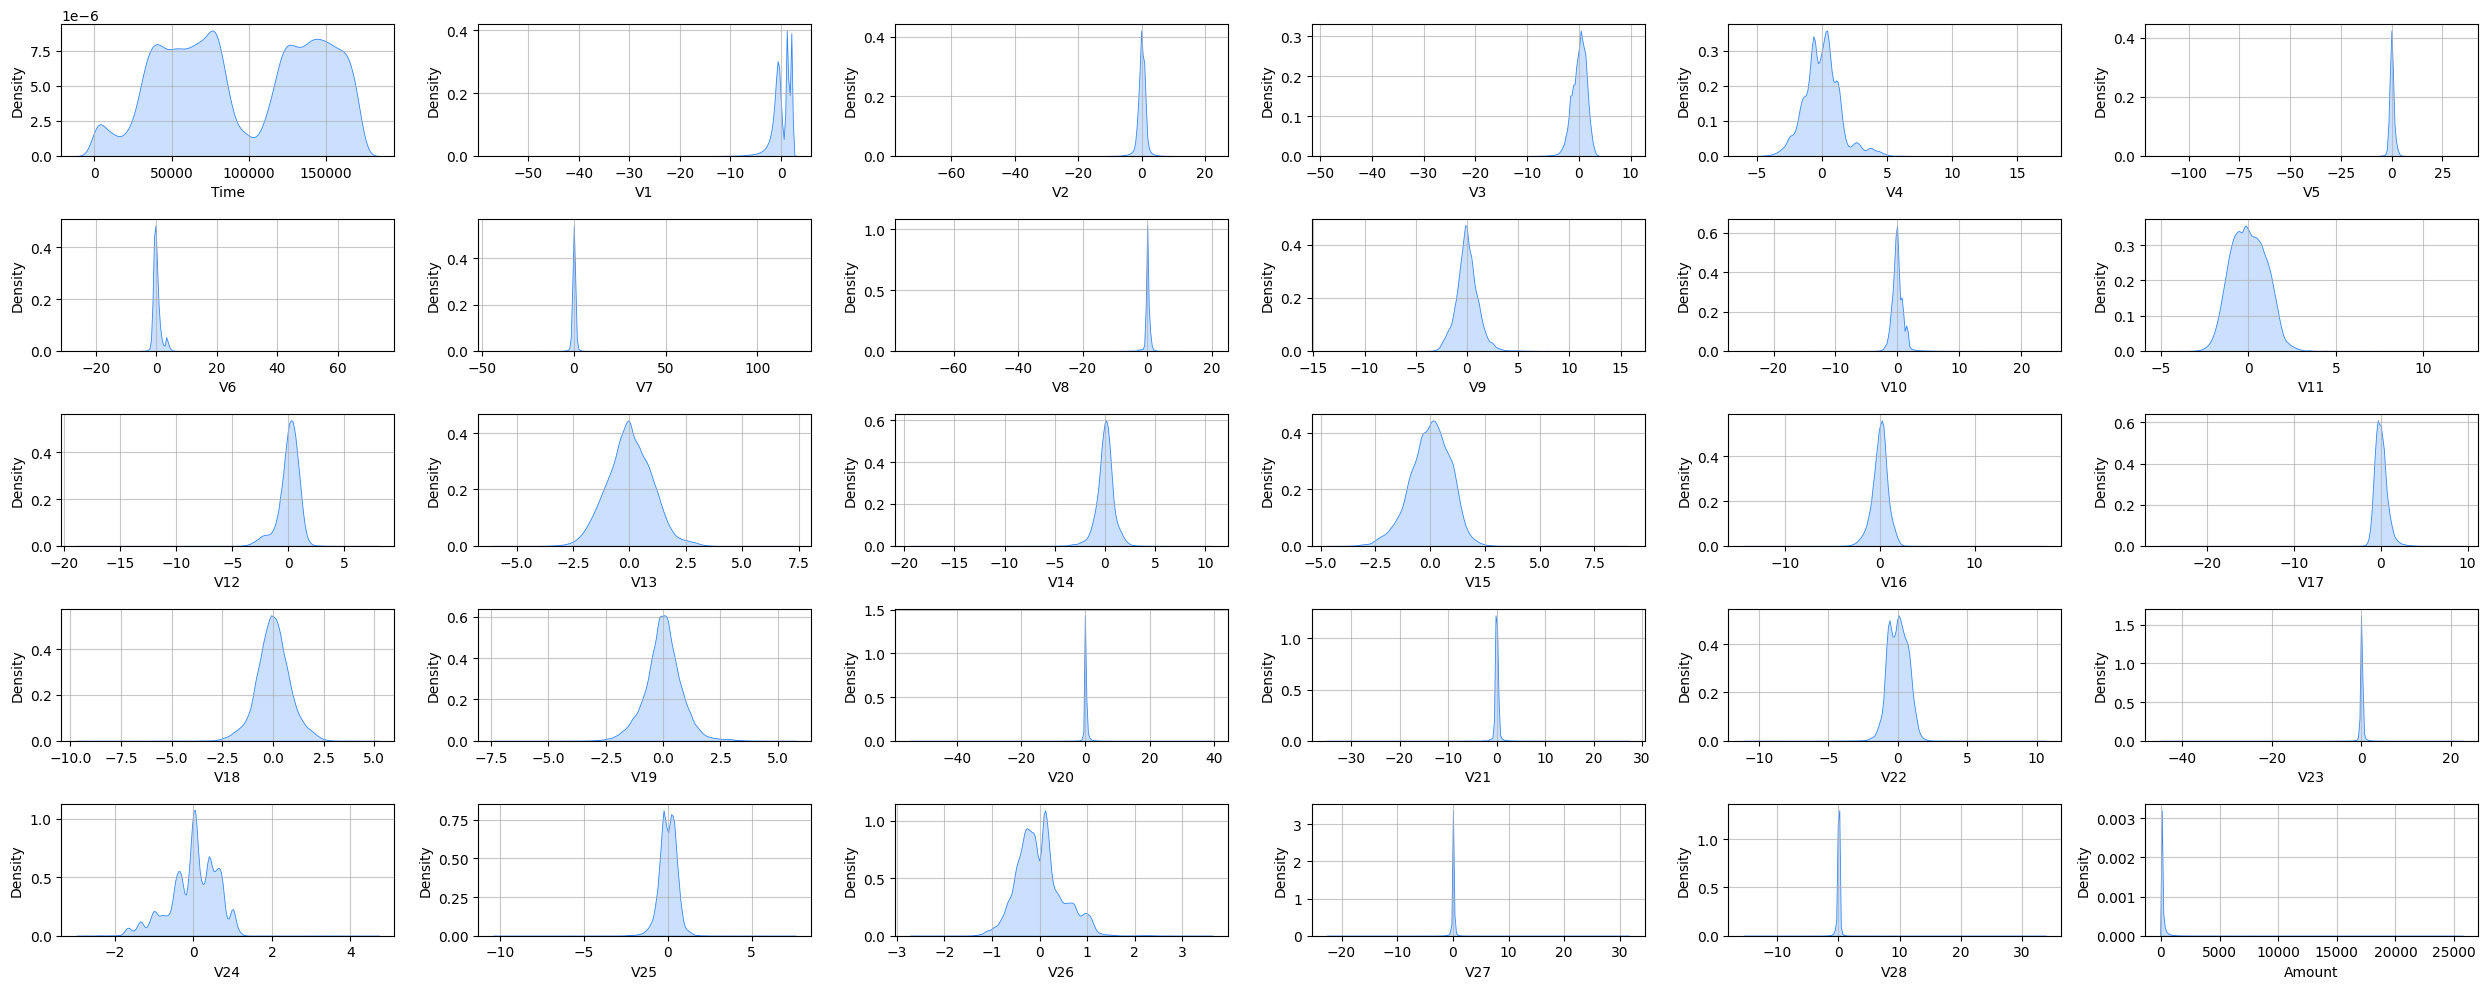

In [ ]:
numeric_columns = (list(data.loc[:, 'Time':'Amount']))


fig = plt.figure(figsize=(25, 10))
rows, cols = 5, 6
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = data)
    ax.set_xlabel(num)
    # ax.legend()
fig.tight_layout()
fig.show()

Making Pie Plot for Class Distribution

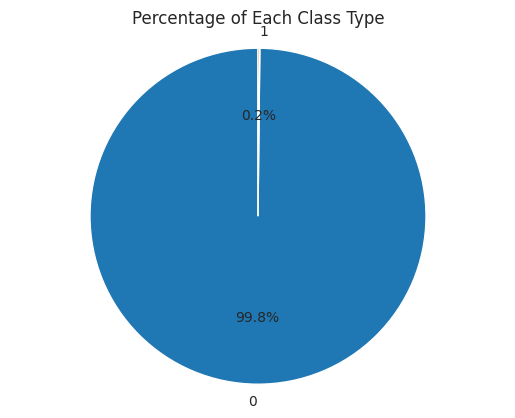

In [ ]:
Class_count = data['Class'].value_counts()
plt.pie(Class_count, labels=Class_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Each Class Type')
plt.show()

Violen Plot for the Data

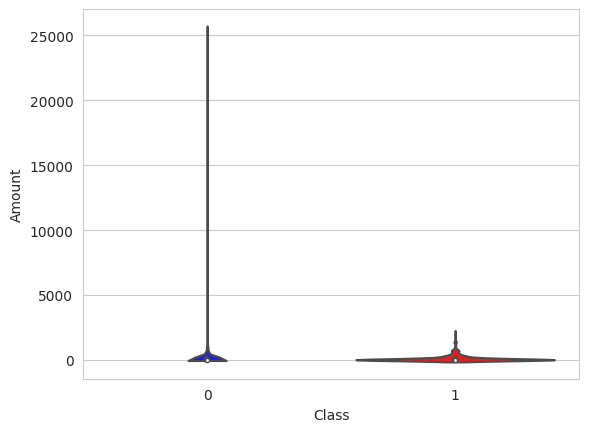

In [ ]:
sns.violinplot(x=data['Class'], y=data['Amount'], palette=['blue', 'red'])
plt.show()

# Splitting the Dataset into X and Y

Also, removing Time since it is not a important feature for training



In [ ]:
Y = data['Class']
X = data.drop(['Class', 'Time'], axis = 1).copy()


Making the Testing Data

In [ ]:
number_records_fraud = len (data[data.Class==1])

fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
random_fraud_indices = np.random.choice (fraud_indices, number_records_fraud, replace = True )

under_sample_indices = np.concatenate ([random_fraud_indices, random_normal_indices])

print(under_sample_indices.shape)

(984,)


In [ ]:
X_test = X.iloc[under_sample_indices,:]
Y_test = Y.iloc[under_sample_indices]

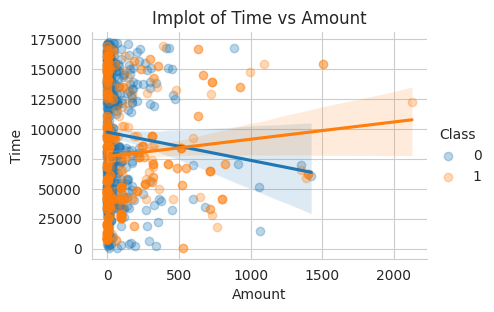

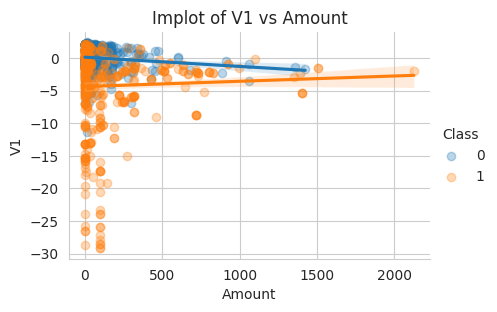

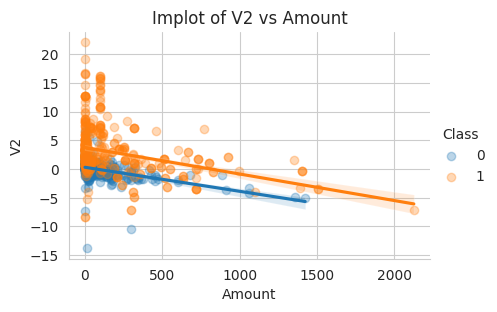

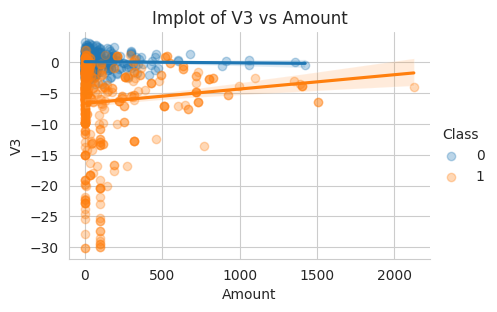

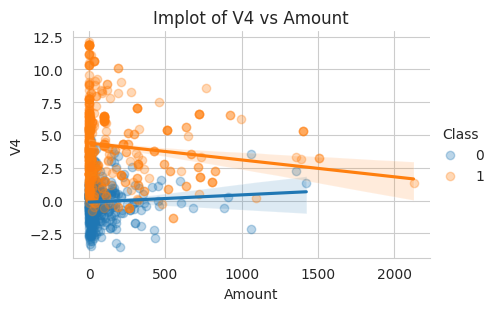

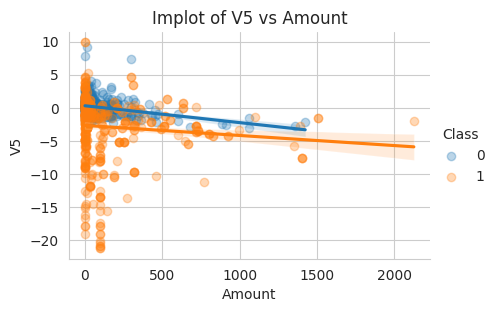

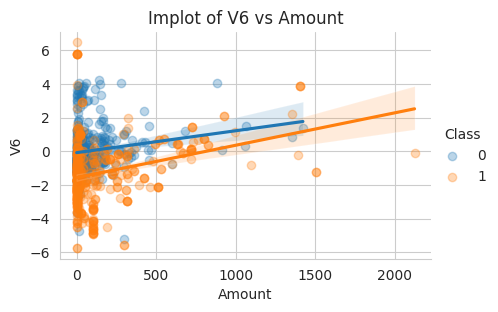

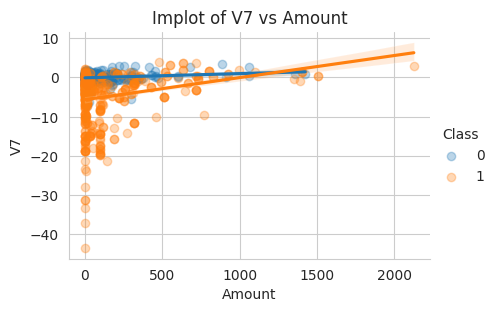

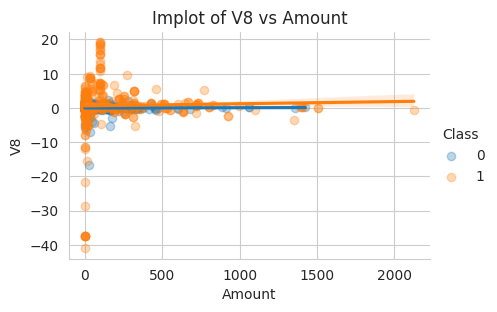

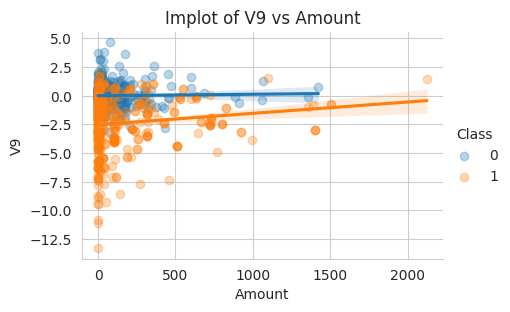

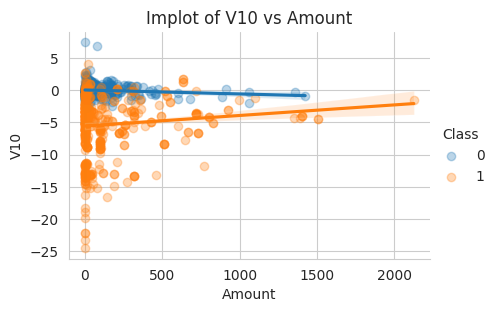

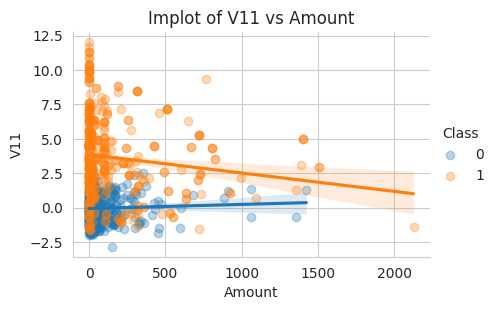

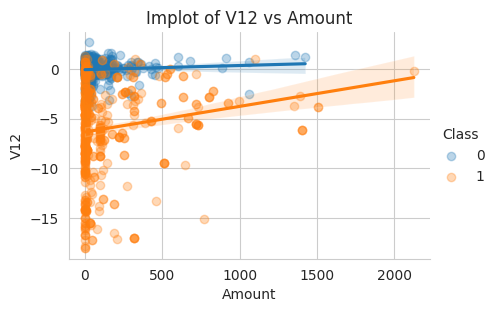

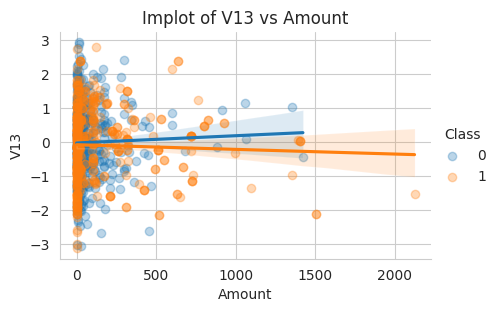

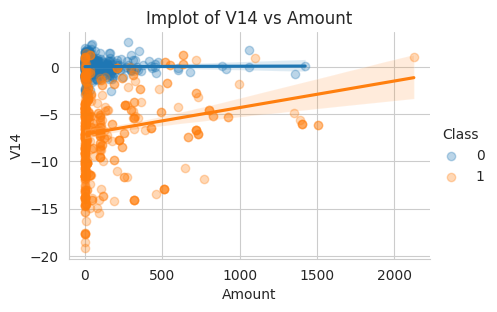

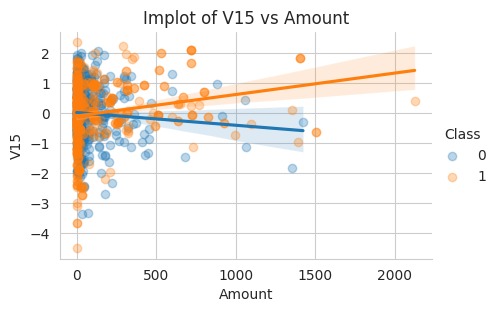

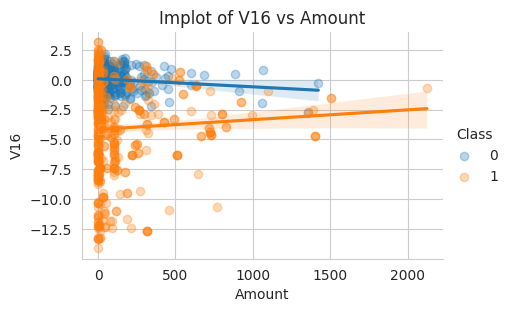

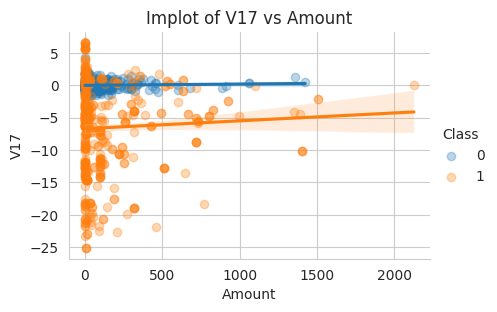

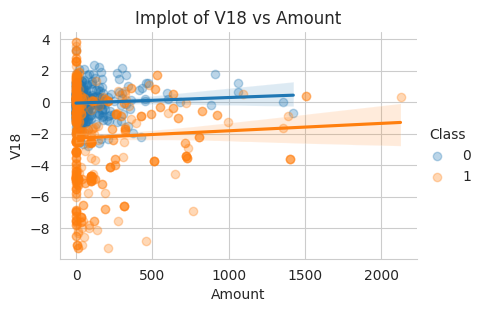

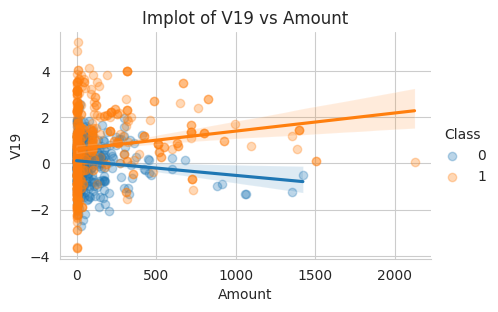

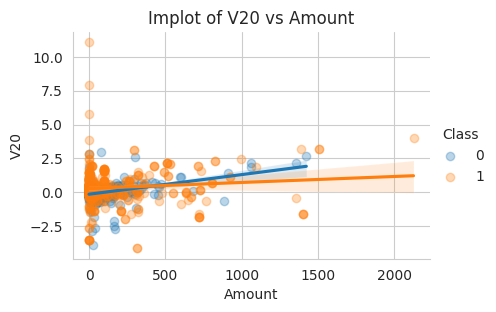

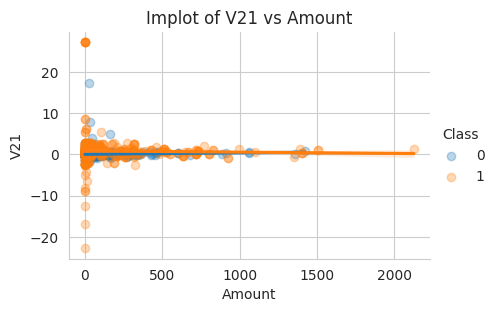

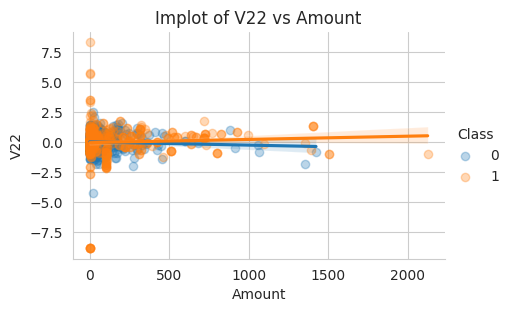

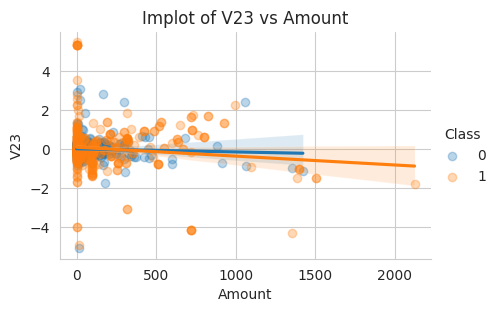

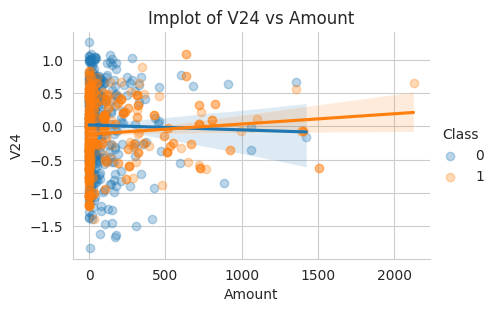

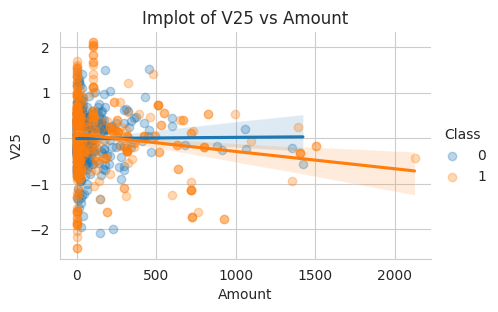

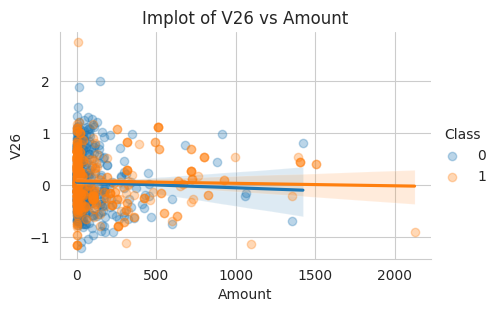

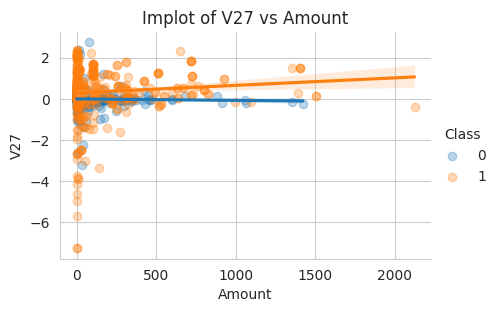

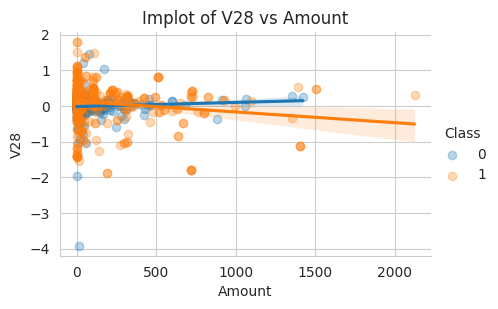

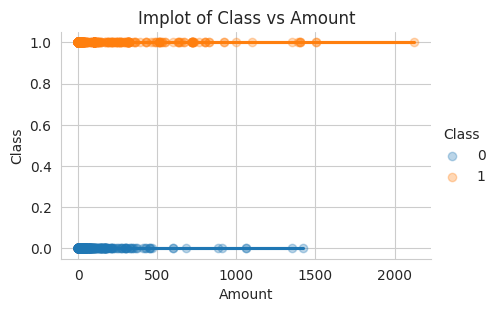

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_implots(df):

    features = [col for col in df.columns if col != "Amount"]

    for feature in features:
        sns.set_style("whitegrid")
        sns.lmplot(x="Amount", y=feature, data=df,hue="Class", height=3,aspect=1.5, scatter_kws={'alpha':0.3}, facet_kws=dict(sharex=True, sharey=True))
        plt.title(f"Implot of {feature} vs Amount")
        plt.show()



create_implots(data.iloc[under_sample_indices, :])

PCA reduces the feature space to 3 dimensions for the test dataset X test. Plotly builds a 3D scatter plot of modified data.

In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import numpy as np


PCA = PCA(n_components = 3)

X1 = PCA.fit_transform(X_test)


fig = go.Figure(data=[go.Scatter3d(x=X1[:, 0], y=X1[:, 1], z=X1[:, 2],mode='markers',
                                  marker=dict(size=3, color=Y_test))])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


# Blue represents Not-Fraud and Yellow represents Fraud entris

Exploring Data by applying Linear Discriminant Ananlysis (LDA)

In [ ]:
class LDA:
    def __init__(self):
        self.idx = []

    def fit(self, X, Y, var = 0.95):

        self.X = X
        self.Y = Y
        unique_classes = np.unique(Y)

        class_data = []

        for c in unique_classes:
            class_data.append((X[Y == c]))

        class_means = []
        for temp_class in class_data:
            class_means.append(np.mean(temp_class, axis=0))

        class_means = np.array(class_means)

        grand_mean = np.mean(X, axis=0)

        self.Scatter_with = np.zeros((X.shape[1], X.shape[1]))

        for i, d in enumerate(class_data):
            diff = d - class_means[i]
            self.Scatter_with += np.dot(diff.T, diff)

        self.Scatter_btw = np.zeros((X.shape[1], X.shape[1]))

        for i, mean_vec in enumerate(class_means):
            n = class_data[i].shape[0]
            diff = (mean_vec - grand_mean).reshape(-1,1)
            self.Scatter_btw += n * np.dot(diff, diff.T)


        self.eigvalues, self.eigvectors = np.linalg.eig(np.dot(np.linalg.inv(self.Scatter_with), self.Scatter_btw))

        temp_zip = zip(self.eigvalues, self.eigvectors.T)

        self.temp_sorted_zip = sorted(temp_zip, key = lambda x: x[0], reverse = True)


    def transform(self, X, n):
        self.W_matrix = []
        for i in range(n):
            self.W_matrix.append(self.temp_sorted_zip[i][1])

        self.W_matrix = np.array(self.W_matrix)
        self.W_matrix = self.W_matrix.T.real

        return np.dot(X, self.W_matrix).real

    def scatter_within(self):
        return self.Scatter_with
    def scatter_between(self):
        return self.Scatter_btw

In [ ]:
LD = LDA()
LD.fit(np.array(X_test), np.array(Y_test))
X_new = LD.transform(X_test, 3)
X_new.shape

(984, 3)

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(x=X_new[:, 0], y=X_new[:, 1], z=X_new[:, 2],mode='markers',
                                  marker=dict(size=3, color=Y_test))])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Making Model from Scratch

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



class BaggingClassifier:

    def __init__(self, clf = DecisionTreeClassifier(), n_estimators = 30):
        self.model = clf
        self.n_estimators = n_estimators
        self.classifiers = []


    def fit(self, X, Y):
        for i in range(self.n_estimators):

            no_frauds = len(Y[Y==1])
            indices_fraud = list(Y[Y==1].index)
            indices_normal = list(Y[Y==0].index)

            random_normal_indices = np.random.choice (indices_normal, no_frauds, replace = False).tolist()
            random_fraud_indices = np.random.choice(indices_fraud, no_frauds, replace = True).tolist()

            under_sample_indices = list((np.concatenate([random_normal_indices, random_fraud_indices])))

            X_train = np.array(X.loc[under_sample_indices])
            Y_train = np.array(Y.loc[under_sample_indices])

            clf = self.model
            clf.fit(X_train, Y_train)
            self.classifiers.append(clf)


    def predict_proba(self, X):

        predictions = []

        for X_temp in X:

            X_temp = list(X_temp)

            predict_temp = []

            for j in range(self.n_estimators):
                predict_temp.append(self.classifiers[j].predict_proba([X_temp])[0].tolist())

            predictions.append(np.sum(predict_temp, axis = 0).tolist())

        return np.array(predictions)



In [ ]:

class model:
    def __init__ (self):
        self.models = [DecisionTreeClassifier(max_depth=7), KNN(n_neighbors = 5), RandomForestClassifier(n_estimators = 10, max_depth = 5)]
        self.Bag_models = []


    def fit(self, X, Y):

        # for i in range(20):

        for clf in self.models:
            temp_bag = BaggingClassifier(clf, n_estimators = 10)
            temp_bag.fit(X, Y)
            self.Bag_models.append(temp_bag)


    def predict(self, X):

        predictions = []

        for X_temp in X:

            X_temp = list(X_temp)

            predict_temp = []

            for temp_bag in self.Bag_models:

                predict_temp.append(temp_bag.predict_proba([X_temp])[0].tolist())

            predictions.append(np.sum(predict_temp, axis = 0).tolist())

        predictions = np.array(predictions)
        return np.where(predictions[:, 0] < predictions[:, 1], 1, 0)

In [ ]:
class main_model:
    def __init__(self):
        self.models = []

    def fit(self, X, Y):

        self. LDA = LDA()
        self.LDA.fit(np.array(X), np.array(Y))

        for i in range(2, 20):
            X_trans = pd.DataFrame(self.LDA.transform(np.array(X), i))

            md = model()
            md.fit(X_trans, Y)

            self.models.append(md)

    def predict(self, X):

        predictions = []
        for i, md in enumerate(self.models):

            X_trans = self.LDA.transform(np.array(X), i+2)

            predictions.append(md.predict(X_trans))

        predictions = np.array(predictions)
        predictions = np.sum(predictions, axis = 0)
        # return predictions
        return np.where(predictions < 9, 0, 1)



Defining the Model and fitting Data into it.

In [ ]:
md = main_model()
md.fit(X, Y)
print(X_test.shape)

(984, 29)


In [ ]:
Y_pred = md.predict(np.array(X_test))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

print("The F1_Score of the trained Model is :", f1_score(Y_pred, Y_test))
print("\nThe Accuracy Score of trained model is :", accuracy_score(Y_pred, Y_test))

print("\nThe Confusion Matrix is :\n", confusion_matrix(Y_pred, Y_test))

The F1_Score of the trained Model is : 0.9631147540983607

The Accuracy Score of trained model is : 0.9634146341463414

The Confusion Matrix is :
 [[478  22]
 [ 14 470]]


In [ ]:
f1_scores = []
accuracy_scores = []


for i in range(5):

    random_indices = np.random.choice (X.shape[0], 100, replace = False )

    X_test = X.loc[random_indices, :]
    Y_test = Y.loc[random_indices]

    Y_pred = md.predict(np.array(X_test))

    accuracy_scores.append(accuracy_score(Y_pred, Y_test))

print("The Accuracies found are :", accuracy_scores)
print("The Mean Accuracy is :", np.sum(accuracy_scores)/len(accuracy_scores))

The Accuracies found are : [0.99, 0.97, 0.98, 0.98, 0.98]
The Mean Accuracy is : 0.9800000000000001
